## Import Python packages 

In [1]:
import numpy as np
import pandas as pd

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.preprocessing import StandardScaler
from numpy import loadtxt
import pickle

## Load transformed testing data 

In [2]:
X_train_combined_Hm = loadtxt('X_train_combined_comb_Hm.csv', delimiter=',')
X_test_combined_Hm = loadtxt('X_test_combined_comb_Hm.csv', delimiter=',')
y_train_combined_Hm = loadtxt('y_train_combined_comb_Hm.csv', delimiter=',')
y_test_combined_Hm = loadtxt('y_test_combined_comb_Hm.csv', delimiter=',')

## Import model

In [3]:
filename = 'Combined_allangles_Hm_best_cat.sav'
loaded_model = pickle.load(open(filename, 'rb'))

## Get test set predictions

In [4]:
y_pred_test = loaded_model.predict(X_test_combined_Hm)

## Give evaluation metrics

In [5]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test_combined_Hm,y_pred_test)
mae = mean_absolute_error(y_test_combined_Hm,y_pred_test)
r2 = r2_score(y_test_combined_Hm,y_pred_test)

print("MAPE:", mape)
print("===")
print("MAE:", mae)
print("===")
print("R2:", r2)

MAPE: 0.18079099726494124
===
MAE: 0.051183939096343535
===
R2: 0.9593175836916253


## Produce error histogram

C:\Users\phy3jenkid\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


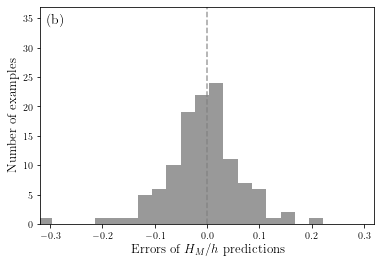

In [6]:
residuals = y_test_combined_Hm - y_pred_test 
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'DeJavu Serif'

fig, ax = plt.subplots()
sns.distplot(residuals, bins = 20, hist=True,kde=False,color="k") # you may select the no. of bins
x_thing = np.zeros((100,1))
y_thing = np.linspace(0,40,100)
plt.xlim([-0.32,0.32])
plt.ylim([0,37])
#plt.title('Error Terms', fontsize=20)           
plt.xlabel(r'Errors of $H_{M} / h$ predictions', fontsize = 13)
plt.ylabel('Number of examples', fontsize = 13)
ax.plot(x_thing, y_thing, "--", alpha=0.75,color="grey")
matplotlib.pyplot.text(0.0225,0.97,"(b)",
                       horizontalalignment='left', verticalalignment='top', fontsize=14, transform = ax.transAxes)
plt.savefig("error_hist_height.jpg", dpi=1200,bbox_inches="tight")
plt.show()

## Create predicted versus observed plot

In [7]:
def make_QQ_pred_FWU_FWU(X_test_combined,y_test_combined,predictions_combined_grid_search):

    fig, ax = plt.subplots()
    
    plt.rcParams['font.family'] = 'DeJavu Serif'
    plt.xlabel(r'Observed $H_{M} / h $', fontsize=13)
    plt.ylabel(r'Predicted $ H_{M} / h$', fontsize=13)
    
    plt.xlim([0,1.4])
    plt.ylim([0,1.4])
    
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontsize(13)  
    max_val = float(np.amax(y_test_combined))
    O = np.linspace(0,max_val + 0.2,1000)
    plt.plot(O,O, color = 'k')
    
    
    count_gran = 0
    count_3dgran = 0 
    count_2dsolid = 0
    count_3dsolid = 0
    
   
            
    for i in range(X_test_combined.shape[0]):    #[F,S,M,(2or3),solid/gran (gran = 0, solid = 1),prop angle]
        if X_test_combined[i,3] == 0 and X_test_combined[i,4] == 0: 
            count_gran += 1 
        elif X_test_combined[i,3] == 1 and X_test_combined[i,4] == 0:
            count_3dgran += 1             
        elif X_test_combined[i,3] == 0 and X_test_combined[i,4] == 1:
            count_2dsolid += 1 
        elif X_test_combined[i,3] == 1 and X_test_combined[i,3] == 1:
            count_3dsolid += 1 
          
            

        
    print("Count each type in results", count_gran, count_3dgran,count_2dsolid,count_3dsolid)
    
    ys_count_gran = np.zeros((count_gran,1))
    ys_count_gran_preds = np.zeros((count_gran,1))
    
    ys_count_3dgran = np.zeros((count_3dgran,1))
    ys_count_3dgran_preds = np.zeros((count_3dgran,1))
    
    ys_count_2dsolid = np.zeros((count_2dsolid,1))
    ys_count_2dsolid_preds = np.zeros((count_2dsolid,1))
    
    ys_count_3dsolid = np.zeros((count_3dsolid,1))
    ys_count_3dsolid_preds = np.zeros((count_3dsolid,1))
    


    count_gran_c = 0
    count_3dgran_c = 0
    count_2dsolid_c = 0
    count_3dsolid_c = 0
        
    for i in range(X_test_combined.shape[0]):    #[F,S,M,(2or3),solid/gran,prop angle]
        if X_test_combined[i,3] == 0 and X_test_combined[i,4] == 0: 
            ys_count_gran[count_gran_c] = y_test_combined[i]
            ys_count_gran_preds[count_gran_c] = predictions_combined_grid_search[i]
            count_gran_c += 1
        elif X_test_combined[i,3] == 1 and X_test_combined[i,4] == 0:
            ys_count_3dgran[count_3dgran_c] = y_test_combined[i]
            ys_count_3dgran_preds[count_3dgran_c] = predictions_combined_grid_search[i]
            count_3dgran_c += 1
        elif X_test_combined[i,3] == 0 and X_test_combined[i,4] == 1:
            ys_count_2dsolid[count_2dsolid_c] = y_test_combined[i]
            ys_count_2dsolid_preds[count_2dsolid_c] = predictions_combined_grid_search[i]
            count_2dsolid_c += 1 
        elif X_test_combined[i,3] == 1 and X_test_combined[i,4] == 1:
            ys_count_3dsolid[count_3dsolid_c] = y_test_combined[i]
            ys_count_3dsolid_preds[count_3dsolid_c] = predictions_combined_grid_search[i]
            count_3dsolid_c += 1 
    
    print(ys_count_gran.shape,ys_count_2dsolid, ys_count_3dsolid.shape)
    
    ax.plot(ys_count_gran , ys_count_gran_preds, "x", color = 'dimgray' , label = '2D granular slides')
    ax.plot(ys_count_2dsolid , ys_count_2dsolid_preds, ".", color = 'dimgray' , label = '2D block slides')
    ax.plot(ys_count_3dgran , ys_count_3dgran_preds, "*", color = 'dimgray' , label = '3D granular slides')
    ax.plot(ys_count_3dsolid ,ys_count_3dsolid_preds, "^", color = 'dimgray' , label = '3D block slides')
    
    matplotlib.pyplot.text(0.02,0.97,"(b)", horizontalalignment='left', verticalalignment='top', fontsize=13, transform = ax.transAxes)
    ax.legend(fontsize=13, loc="lower right",facecolor='lightgrey')
    #plt.savefig("hallpaper_newer_allfour.jpg", dpi=1200,bbox_inches="tight")
    plt.show()

Count each type in results 43 18 35 22
(43, 1) [[1.06916667]
 [0.76916667]
 [1.05125   ]
 [0.69625   ]
 [0.21708333]
 [0.33979167]
 [0.18883333]
 [0.19533333]
 [0.66933333]
 [0.1585    ]
 [0.15733333]
 [0.46266667]
 [0.22      ]
 [0.15983333]
 [0.31833333]
 [0.62866667]
 [0.69333333]
 [0.798     ]
 [0.20766667]
 [0.55533333]
 [0.79166667]
 [0.22883333]
 [0.25233333]
 [0.39966667]
 [0.186     ]
 [0.343     ]
 [0.75033333]
 [0.20166667]
 [0.25733333]
 [0.18233333]
 [0.37633333]
 [0.27716667]
 [0.2025    ]
 [0.1855    ]
 [0.52866667]] (22, 1)


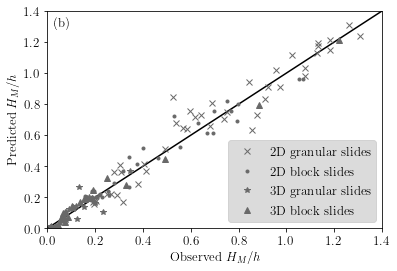

In [8]:
make_QQ_pred_FWU_FWU(X_test_combined_Hm,y_test_combined_Hm,y_pred_test)

## Import the data pre-processing tool trained on the training data

In [9]:
with open('scaler.pkl','rb') as f:
    data_scaler = pickle.load(f)

## Establish Lituya Bay case conditions

In [10]:
LB_case_noProp = np.array((2.66,0.75,6.74,0,1,0)).reshape((1,6))
LB_case = np.array((2.66,0.75,6.74,0,1,0)).reshape((1,6))
LB_case[:,[0,1,2,5]] = data_scaler.transform(LB_case[:,[0,1,2,5]])
print(LB_case)

[[ 0.65955408  1.32814566  4.54384304  0.          1.         -0.54910875]]


## Make prediction for Lituya Bay case

In [12]:
print("The ML model predicts the maximum wave height to be:",round(float(loaded_model.predict(LB_case) * 122), 2),"meters.")

The ML model predicts the maximum wave height to be: 166.15 meters.
